this is an outline notebook- sections are suggested steps, but more or less steps can be followed to reach your end goal

# Classification problem - predicting the take up of a credit card offer 

The bank wants to better understand the demographics and other characteristics of its customers that accept a credit card offer and that do not accept a credit card. You have been challenged to predict whether a customer will or wont accept the offer using a machine learning model. 

**Our main question is: <br/>**
*Will the customer accept the credit card offer? Y/N*


The **definition of the features** is the following:
- **Customer Number:** A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
- **Offer Accepted:** Did the customer accept (Yes) or reject (No) the offer. Reward: The type of reward program offered for the card.
- **Reward Type:** air miles, cash back or points... what type of credit card rewards the customer takes
- **Mailer Type:** Letter or postcard.
- **Income Level:** Low, Medium or High.
- **#Bank Accounts Open:** How many non-credit-card accounts are held by the customer.
- **Overdraft Protection:** Does the customer have overdraft protection on their checking account(s) (Yes or No).
- **Credit Rating:** Low, Medium or High.
- **#Credit Cards Held:** The number of credit cards held at the bank.
- **#Homes Owned:** The number of homes owned by the customer.
- **Household Size:** Number of individuals in the family.
- **Own Your Home:** Does the customer own their home? (Yes or No).
- **Average Balance:** Average account balance (across all accounts over time). Q1, Q2, Q3 and Q4
- **Balance:** Average balance for each quarter in the last year


Be careful- the data is imbalanced towards customers who say No to the offer. This imbalance would have to be managed with sampling methods. 

## Import Libraries

In [481]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Read data as a pandas data frame, preview top 10 rows

In [482]:
df = pd.read_csv('creditcardmarketing.csv')

In [483]:
df.head(10)

,Customer_number,Offer_Accepted,Reward_Type,Mailer_Type,Income,No_open_bank_accounts,Overdraft_protection,Credit_rating,No_credit_cards,Homes_owned,Household_size,Own_your_home?,Average_Balance,Q1_balance,Q2_balance,Q3_balance,Q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0


In [484]:
df['Offer_Accepted'].value_counts()

No     16977
Yes     1023
Name: Offer_Accepted, dtype: int64

## sampling technique - random oversampling, smote, tomelinks

# Exploratory Data Analysis

In this part we want to familirize ourselves with the data set. We are going to look at the following steps:
- assess dataframe 
- shape, dtypes, summary statistics
- null values, white spaces, duplicates, (amount)unique values per col /unique(written same), mislabeled classes (male ≠ Male), typos/inconsistent capitalisation, irrelevant columns
- missing data
- outliers 

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_number        18000 non-null  int64  
 1   Offer_Accepted         18000 non-null  object 
 2   Reward_Type            18000 non-null  object 
 3   Mailer_Type            18000 non-null  object 
 4   Income                 18000 non-null  object 
 5   No_open_bank_accounts  18000 non-null  int64  
 6   Overdraft_protection   18000 non-null  object 
 7   Credit_rating          18000 non-null  object 
 8   No_credit_cards        18000 non-null  int64  
 9   Homes_owned            18000 non-null  int64  
 10  Household_size         18000 non-null  int64  
 11  Own_your_home?         18000 non-null  object 
 12  Average_Balance        17976 non-null  float64
 13  Q1_balance             17976 non-null  float64
 14  Q2_balance             17976 non-null  float64
 15  Q3

## nulls = zero balance or drop rows

## Visualisations

We want to visualise the relationships between between the different features in the data.

In [486]:
# how many accepted the offer vs who didn't


In [487]:
# what's the avg balance of customers who accepted the offer vs who didn't


In [488]:
# how do the different income levels of who accepted the offer compare with those who didn't


In [489]:
# how does yes/no look with the number of homes owned


Let's see the relationship between the quarters and offer accepted.

In [490]:
# what's the q1 balance of customers who accepted the offer vs who didn't


In [491]:
# what's the q2 balance of customers who accepted the offer vs who didn't


In [492]:
# what's the q3 balance of customers who accepted the offer vs who didn't


In [493]:
# what's the q4 balance of customers who accepted the offer vs who didn't



# Cleaning & Wrangling

**Tasks**
- drop 'customer_number' column
- drop null values
- convert float columns to int

## before cleaning, create a copy of the dataframe


## drop customer_number column


## drop rows with missing values


In [494]:
df.dropna(inplace=True)

In [495]:
df.reset_index()

,index,Customer_number,Offer_Accepted,Reward_Type,Mailer_Type,Income,No_open_bank_accounts,Overdraft_protection,Credit_rating,No_credit_cards,Homes_owned,Household_size,Own_your_home?,Average_Balance,Q1_balance,Q2_balance,Q3_balance,Q4_balance
0,0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17972,17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17973,17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17974,17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


## converting columns from float to int


## test using info()


# Preprocessing

**Tasks:**
- num vs cat data (split)
- multicollinearity
- imbalance
- distribution plots (normalising, scaling, outlier detection)
- normalizer
- encoding into dummies

## split numerical and categorical data into two dataframes


In [496]:
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

In [497]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_number        17976 non-null  int64  
 1   No_open_bank_accounts  17976 non-null  int64  
 2   No_credit_cards        17976 non-null  int64  
 3   Homes_owned            17976 non-null  int64  
 4   Household_size         17976 non-null  int64  
 5   Average_Balance        17976 non-null  float64
 6   Q1_balance             17976 non-null  float64
 7   Q2_balance             17976 non-null  float64
 8   Q3_balance             17976 non-null  float64
 9   Q4_balance             17976 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.5 MB


In [498]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Offer_Accepted        17976 non-null  object
 1   Reward_Type           17976 non-null  object
 2   Mailer_Type           17976 non-null  object
 3   Income                17976 non-null  object
 4   Overdraft_protection  17976 non-null  object
 5   Credit_rating         17976 non-null  object
 6   Own_your_home?        17976 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


## correlation matrix for numerical columns -any highly correlated pairs we should drop ? 


## scaling numerical columns with normalizer if needed 


## encoding categorical features if needed 


In [499]:
X_cat = pd.get_dummies(df_cat, drop_first=True)

In [500]:
X_cat.head()

,Offer_Accepted_Yes,Reward_Type_Cash Back,Reward_Type_Points,Mailer_Type_Postcard,Income_Low,Income_Medium,Overdraft_protection_Yes,Credit_rating_Low,Credit_rating_Medium,Own_your_home?_Yes
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,1


## bring back together num and cat

In [501]:
df = pd.concat((df_num, X_cat), axis=1)

In [502]:
df.head()

,Customer_number,No_open_bank_accounts,No_credit_cards,Homes_owned,Household_size,Average_Balance,Q1_balance,Q2_balance,Q3_balance,Q4_balance,Offer_Accepted_Yes,Reward_Type_Cash Back,Reward_Type_Points,Mailer_Type_Postcard,Income_Low,Income_Medium,Overdraft_protection_Yes,Credit_rating_Low,Credit_rating_Medium,Own_your_home?_Yes
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,0,0,0,0,0,0,0,0,0,0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0,0,0,0,0,0,1,0,0,1,1
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0,0,0,0,1,0,0,0,0,1,1
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,0,0,0,0,0,1,0,0,0,0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,0,0,0,0,0,1,0,0,1,1


# split off the dependant class (label)


In [503]:
X = df.drop(['Offer_Accepted_Yes'], axis=1)

In [504]:
y = df['Offer_Accepted_Yes']


In [505]:
#checking the len of x_normalized & cat_clean before merging back together in X


In [506]:
# bring the numerical data (scaled)in with the categorical using concat



# Modelling

**- iteration 1 (X)**

In our first iteration we only used preprocessing and encoding, we use this as a benchmark for the next iterations to compare to.

**- iteration 2 (X_i2)**

SMOTE sampling to improve the imbalance of the target
drop some selected columns 

**- iteration 3 (X_i3)**

example - dropping quarterly balance columns to reduce noise, encode numerical features to categories as appropriate 
implementing KNN or decision tree



# Modeling (X)

In [507]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Test & Train

In [508]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# model development
## create a Logistic Regression classifier (classification) object using LogisticRegression() function
## fit model on the train set using fit()


In [509]:

neigh = KNeighborsClassifier(n_neighbors=8)

neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8)

## perform prediction on the test set using predict()


In [510]:
y_pred = neigh.predict(X_test)

## check the predictions array


In [511]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# Accuracy metrics and visuals

In [512]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

## calculating the accuracy score


In [513]:
accuracy_score(y_test, y_pred)

0.9414055256814389

In [514]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5078
           1       0.00      0.00      0.00       315

    accuracy                           0.94      5393
   macro avg       0.47      0.50      0.48      5393
weighted avg       0.89      0.94      0.91      5393



## Confusion matrix

In [515]:
cnf_mat_it1 = confusion_matrix(y_test, y_pred)
cnf_mat_it1

array([[5077,    1],
       [ 315,    0]])

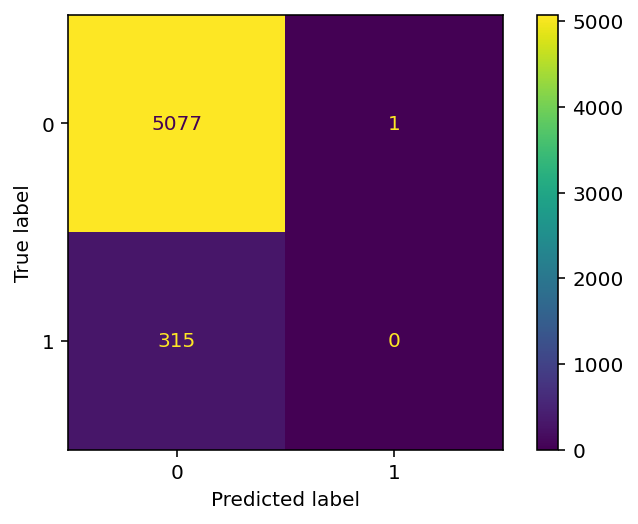

In [516]:
plot_confusion_matrix(neigh, X_test, y_test)

#### ROC/AUC

**ROC Curve**
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

- the closer to left hand corner the better
- should not be below 0.5 (random) 'red' line

**AUC** - area under the curve the bigger the area under the curve the better the model
1 represents perfect classifier, and 0.5 represents a worthless classifier.<br/>



## Are we using the right K?
### for loop and collect errors for each K attempt
### plot the errors

In [517]:
error = []
for i in range(2, 18):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'avgerror')

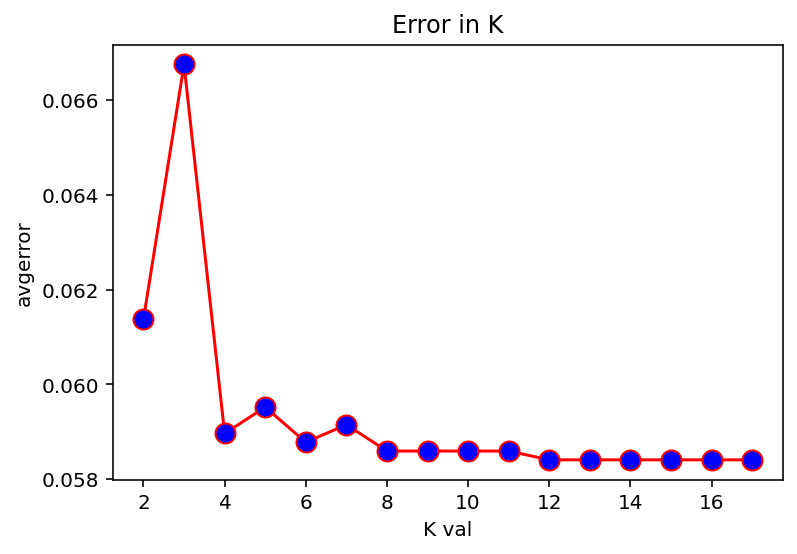

In [518]:
import pylab as pl
pl.figure(figsize=(6, 4))
pl.plot(range(2, 18), error, color='red', marker='o', markerfacecolor='blue', markersize=10)
pl.title('Error in K')
pl.xlabel('K val')
pl.ylabel('avgerror')

# Modeling (X_i2)

### drop selected columns 



### import needed libraries


In [519]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

### define smote variable


In [520]:
smote = SMOTE()
X_it2 , y_it2 = smote.fit_resample(X, y)
y_it2.value_counts()

0    16955
1    16955
Name: Offer_Accepted_Yes, dtype: int64

### recreate X and y applying smote


# Test & Train

## redo train test split it2


In [521]:
X_train_it2, X_test_it2, y_train_it2, y_test_it2 = train_test_split(X_it2, y_it2, test_size=0.3, random_state=40)

## apply model it2 


In [522]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train_it2, y_train_it2)

KNeighborsClassifier(n_neighbors=8)

In [523]:
y_pred_it2 = neigh.predict(X_test_it2)

# Accuracy metrics and visuals

In [524]:
accuracy_score(y_test_it2, y_pred_it2)

0.8364297650643862

In [525]:
print(classification_report(y_test_it2, y_pred_it2))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      4999
           1       0.77      0.97      0.86      5174

    accuracy                           0.84     10173
   macro avg       0.86      0.83      0.83     10173
weighted avg       0.86      0.84      0.83     10173



#### Confusion matrix

#### ROC

**Comparision accuracy and recall it1 and it2**

accuracy it1 = 
accuracy it2 = 



## Modeling (X_i3)

In [526]:
from sklearn.tree import DecisionTreeClassifier

In [527]:
tree = DecisionTreeClassifier()

### Test and Train 

In [528]:
X_train_it3, X_test_it3, y_train_it3, y_test_it3 = train_test_split(X_it2, y_it2, test_size=0.3, random_state=40)

In [529]:
treemodel = tree.fit(X_train_it3, y_train_it3)

In [530]:
y_pred_it3 = treemodel.predict(X_test_it3)

### Accuracy metrics and visuals

In [531]:
accuracy_score(y_test_it3, y_pred_it3)


0.8588420328320063

In [532]:
print(classification_report(y_test_it3, y_pred_it3))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4999
           1       0.84      0.89      0.86      5174

    accuracy                           0.86     10173
   macro avg       0.86      0.86      0.86     10173
weighted avg       0.86      0.86      0.86     10173



#### Confusion matrix

**Comparision confusion matrix it1, it2, it3




#### ROC

**Comparision ROC & AUC it1, it2 and it3 



# Findings and Conclusion


